In [131]:
import pickle
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from random import randint
import warnings
warnings.filterwarnings("ignore")

with open('tfidf_vectorizer.pkl', 'rb') as vectorizer_file:
    tfidf_vectorizer = pickle.load(vectorizer_file)
with open('mlb.pkl', 'rb') as mlb_file:
    mlb = pickle.load(mlb_file)

with open('random_forest_classifier.pkl', 'rb') as classifier_file:
    rf_classifier = pickle.load(classifier_file)
    
data=pd.read_csv('out.csv',low_memory=False)



In [132]:
data=pd.read_excel('m1.xlsx')
#data=data.head(15)

In [133]:
#data['title']=
data

,title,desc,genre,predict
0,Leo,Parthiban is a mild mannered cafe owner in Kas...,"""Action"",""Crime"",""Drama""",NaN
1,The Shawshank Redemption,"Over the course of several years, two convicts...","""Drama""",NaN
2,The Godfather,"Don Vito Corleone, head of a mafia family, dec...","""Crime"",""Drama""",NaN
3,The Dark Knight,When the menace known as the Joker wreaks havo...,"""Action"",""Crima"",""Drama""",NaN
4,The Godfather Part II,The early life and career of Vito Corleone in ...,"""Crime"",""Drama""",NaN
5,12 Angry Men,The jury in a New York City murder trial is fr...,"""Crime"",""Drama""",NaN
6,Schindler's List,"In German-occupied Poland during World War II,...","""Drama"",""History""",NaN
7,The Lord of the Rings: The Return of the King,Gandalf and Aragorn lead the World of Men agai...,"""Action"",""Adventure"",""Drama""",NaN
8,Pulp Fiction,"The lives of two mob hitmen, a boxer, a gangst...","""Crime"",""Drama""",NaN
9,The Lord of the Rings: The Fellowship of the Ring,A meek Hobbit from the Shire and eight compani...,"""Action"",""Adventure"",""Drama""",NaN


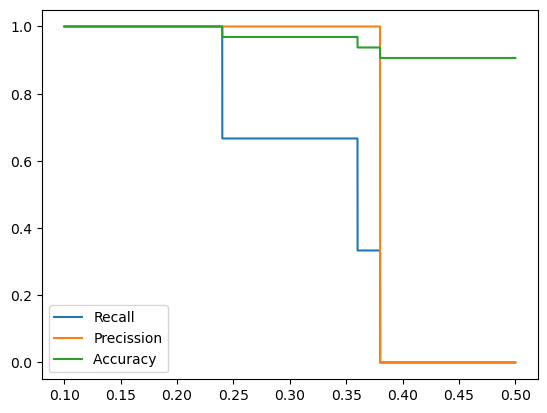

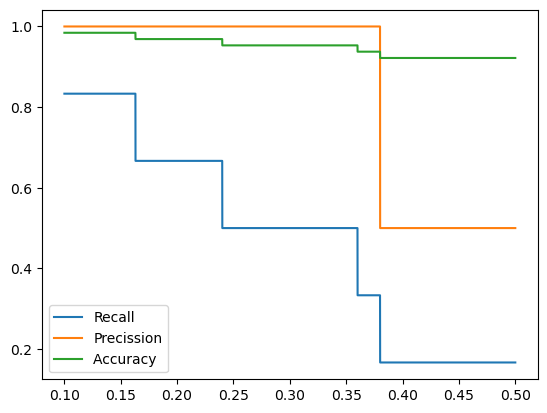

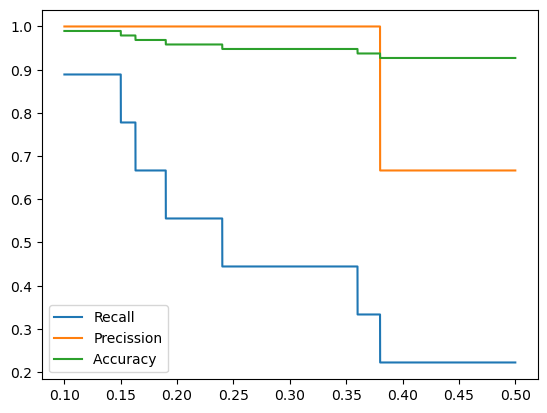

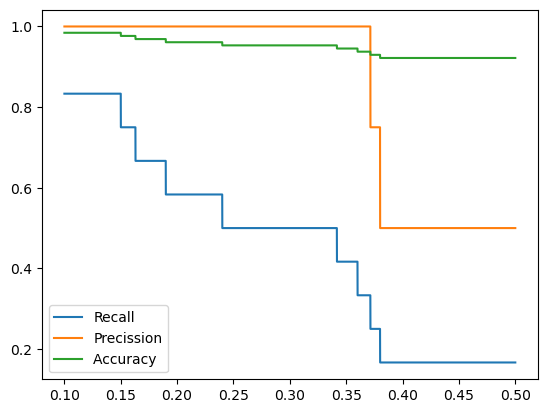

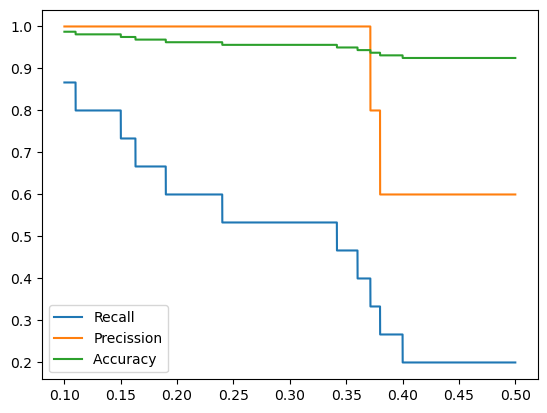

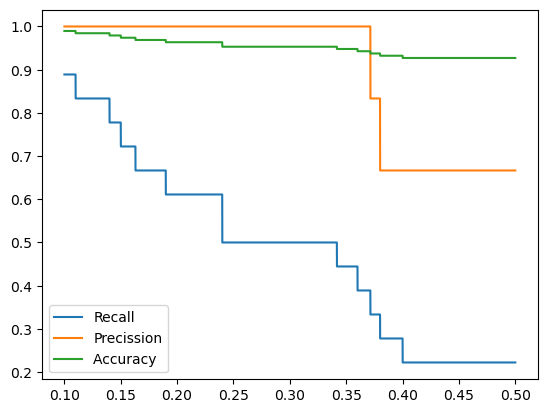

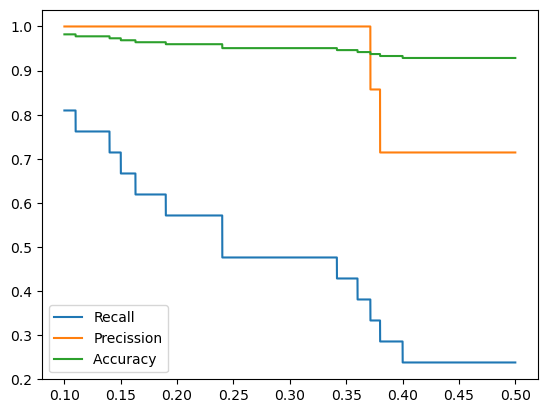

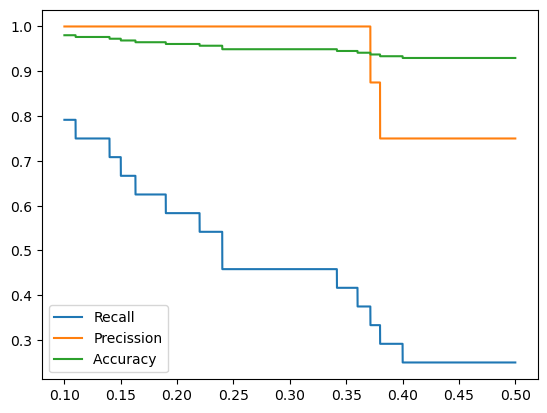

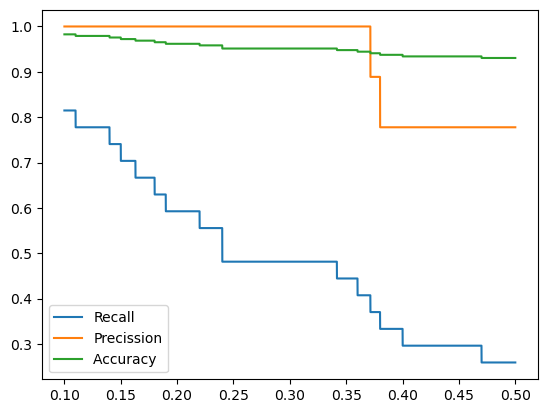

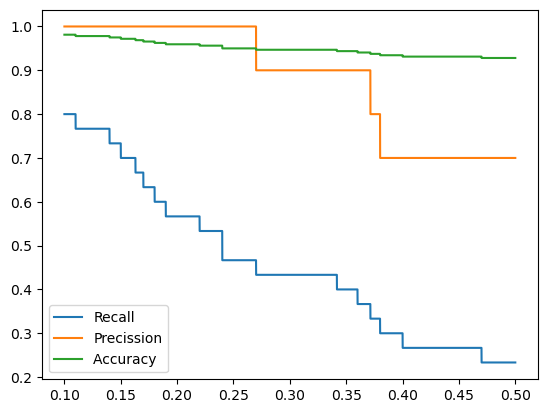

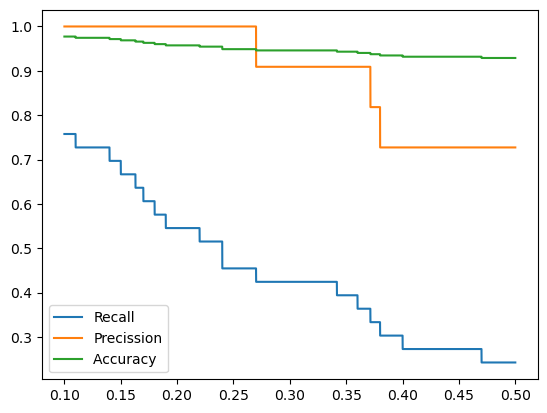

In [159]:
import numpy as np
import matplotlib.pyplot as plt
import ast
f=0
rl=[]
pre=[]
accc=[]
for l in range(len(data['title'])):
    #print(l)
    f=0
    full_text=str(data['title'][l])
    dec=str(data['desc'][l])
    input_text=full_text+'_'+dec
    input_text=[input_text]
    input_vector = tfidf_vectorizer.transform(input_text).toarray()
    predicted_probabilities = rf_classifier.predict_proba(input_vector)
    
    new=list()
    for i in range(len(predicted_probabilities)):
        new.append(1-predicted_probabilities[i][0][0])
    new
    confusion=[]
    confusion=pd.DataFrame({'label':mlb.classes_})
    confusion['positive_weight']=new
    confusion
    
    lkt=list()
    for i in range(1000,5001,1):
        #print(i)
        treshold=i/10000
        pred=list()
        lkt.append(treshold)
        for i in new:
            if i >= treshold:
                pred.append(1)
            else:
                pred.append(0)
            l=np.array([pred])

        #print(pred,treshold)
        confusion[treshold]=pred
        predicted_labels_text = mlb.inverse_transform(l)
        #print(predicted_labels_text)
    new = data['genre'].tolist()
    new=new[f]
    
    
    genre_list = ast.literal_eval(new)
    y_test = mlb.transform([genre_list])
    f+=1
    #print(y_test)
    confusion['actual']=y_test[0]
    a=confusion['actual']
    tp=0
    tn=0
    fp=0
    fn=0
    rc1=0
    tpl=[]
    tnl=[]
    fpl=[]
    fnl=[]

    for i in lkt:     
        b=confusion[i]
        tp=0
        tn=0
        fp=0
        fn=0
        for i in range(len(a)):
            if a[i]==1 &b[i]==1:
                tp+=1
            elif a[i]==0 &b[i]==0:
                tn+=1
            elif a[i]==0 & b[i]==1:
                fp+=1
            else:
                fn+=1
        tpl.append(tp)
        tnl.append(tn)
        fpl.append(fp)
        fnl.append(fn)
    rc1=[]
    recall = []
    for i in range(len(tpl)):
        rc1.append(tpl[i]+fnl[i])
        if rc1[i]!=0 :

            recall.append(tpl[i] / rc1[i])
        else:
            recall.append(0)
    pr1=[]
    prec = []
    for i in range(len(tpl)):
        pr1.append(tpl[i]+fpl[i])
        if tpl[i]!=0 :
            prec.append(tpl[i] / pr1[i])
        else:
            prec.append(0)
    ac1=[]
    acc = []
    for i in range(len(tpl)):
        a=tpl[i]+tnl[i]
        b=a+fpl[i]+fnl[i]
        if a!=0 :
            acc.append(a / b)
        else:
            acc.append(0)
    
    
    rl.append(recall)
    pre.append(prec)
    accc.append(acc)
    f=[]
    m=[]
    a=[]
    for i in range(len(rl[0])):
        ff=0
        for j in range(len(rl)):
            ff+=rl[j][i]
        f.append(ff/len(rl))
    #print(f)
    for i in range(len(pre[0])):
        ff=0
        for j in range(len(pre)):
            ff+=pre[j][i]
        m.append(ff/len(pre))
    s=[]
    for i in range(len(pre[0])):
        ff=0
        for j in range(len(accc)):
            ff+=accc[j][i]
        a.append(ff/len(accc))
    
    plt.plot(lkt,f,label='Recall')
    plt.plot(lkt,m,label='Precission')
    plt.plot(lkt,a,label='Accuracy ')
    plt.legend()
    plt.show()


In [135]:
confusion

,label,positive_weight,0.1,0.11,0.12,0.13,0.14,0.15,0.16,0.17,...,0.42,0.43,0.44,0.45,0.46,0.47,0.48,0.49,0.5,actual
0,Action,0.03,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,Adventure,0.03,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Animation,0.00,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Aniplex,0.00,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,BROSTA TV,0.00,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,Carousel Productions,0.00,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,Comedy,0.17,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
7,Crime,0.10,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
8,Documentary,0.06,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,Drama,0.60,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


In [152]:
f=[]
m=[]
for i in range(len(rl[0])):
    ff=0
    for j in range(len(rl)):
        ff+=rl[j][i]
    f.append(ff/len(rl))
print(f)
for i in range(len(pre[0])):
    ff=0
    for j in range(len(pre)):
        ff+=pre[j][i]
    m.append(ff/len(pre))



[0.7575757575757577, 0.7272727272727273, 0.7272727272727273, 0.7272727272727273, 0.7272727272727273, 0.6969696969696969, 0.6666666666666666, 0.6363636363636364, 0.606060606060606, 0.5454545454545454, 0.5454545454545454, 0.5454545454545454, 0.5151515151515151, 0.5151515151515151, 0.5151515151515151, 0.45454545454545453, 0.45454545454545453, 0.45454545454545453, 0.42424242424242425, 0.42424242424242425, 0.42424242424242425, 0.42424242424242425, 0.42424242424242425, 0.42424242424242425, 0.42424242424242425, 0.3939393939393939, 0.3939393939393939, 0.36363636363636365, 0.3333333333333333, 0.303030303030303, 0.303030303030303, 0.2727272727272727, 0.2727272727272727, 0.2727272727272727, 0.2727272727272727, 0.2727272727272727, 0.2727272727272727, 0.2727272727272727, 0.2424242424242424, 0.2424242424242424, 0.2424242424242424]


In [153]:
s=[]
for i in range(len(pre[0])):
    mm=f[i]+m[i]
    mm1=f[i]*m[i]
    mm1=mm1*2
    s.append((mm1/mm))

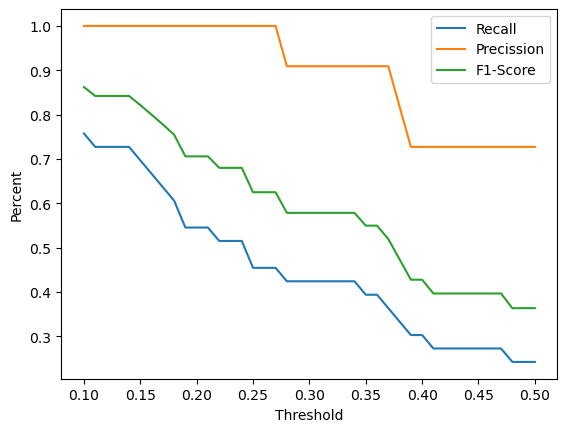

In [154]:
import matplotlib.pyplot as plt
plt.plot(lkt,f,label='Recall')
plt.plot(lkt,m,label='Precission')
plt.plot(lkt,s,label='F1-Score')
plt.xlabel('Threshold')
plt.ylabel("Percent")
plt.legend()
plt.show()

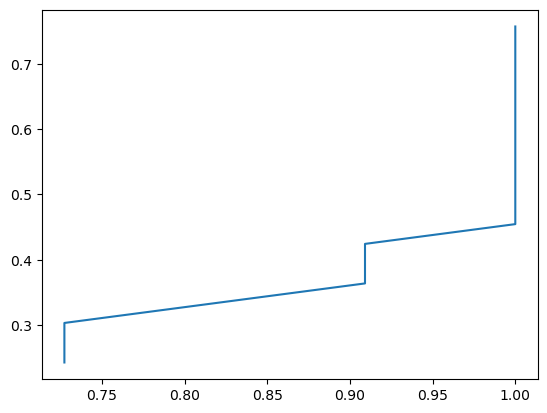

In [155]:
import matplotlib.pyplot as plt
plt.plot(m,f)
plt.show()

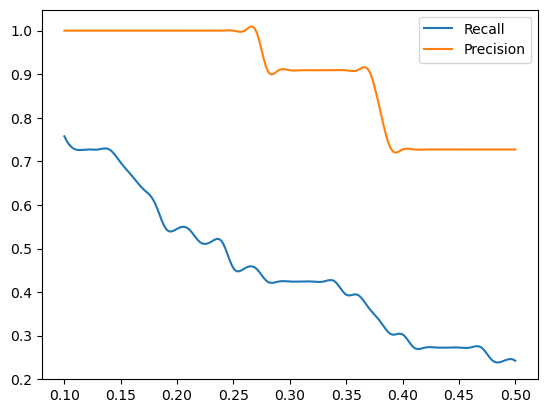

In [139]:

from scipy.interpolate import make_interp_spline, BSpline
x=np.array(lkt)
y=f
Y=m
xnew = np.linspace(x.min(), x.max(), 200) 

#define spline
spl = make_interp_spline(x, y, k=3)
y_smooth = spl(xnew)
spl1= make_interp_spline(x, Y, k=3)
y_smooth1 = spl1(xnew)
#create smooth line chart 
plt.plot(xnew, y_smooth,label='Recall')
plt.plot(xnew, y_smooth1,label='Precision')
plt.legend()
plt.show()

In [144]:
    f=[]
    m=[]
    for i in range(len(rl[0])):
        ff=0
        for j in range(len(rl)):
            ff+=rl[j][i]
        f.append(ff/len(rl))
    print(f)
    for i in range(len(pre[0])):
        ff=0
        for j in range(len(pre)):
            ff+=pre[j][i]
        m.append(ff/len(pre))
    s=[]
    for i in range(len(pre[0])):
        mm=f[i]+m[i]
        mm1=f[i]*m[i]
        mm1=mm1*2
        #s.append((mm1/mm))
    
    plt.plot(lkt,f,label='Recall')
    plt.plot(lkt,m,label='Precission')
    #plt.plot(lkt,s,label='F1-Score')
    plt.legend()
    plt.show()

ValueError: Iterable over raw text documents expected, string object received.